In [1]:
import pandas as pd
import numpy as np

# Load Data
The data used for this assignment is from https://grouplens.org/datasets/movielens/latest/ using the small set.

In [2]:
movies = pd.read_csv('ml-latest-small/movies.csv')

In [3]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')

In [4]:
tags = pd.read_csv('ml-latest-small/tags.csv')

In [5]:
links = pd.read_csv('ml-latest-small/links.csv')

# Manipulate Data

Extract the year from the movie title and store it in a seperate column (not all movies have the year so those will have a value of 0)

In [6]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)', expand=False).astype('float64').fillna(0).astype('int64')

In [7]:
movies.dtypes

movieId     int64
title      object
genres     object
year        int64
dtype: object

In [8]:
movies.shape

(9742, 4)

In [9]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


retrieve all the genres available in the movies table

In [10]:
genres = set(movies['genres'].str.cat(sep='|').split('|'))

In [11]:
genres

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [12]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [13]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Data Aggregation 

In [14]:
movie_data = pd.merge(ratings, movies, on='movieId')

In [15]:
movie_data.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995


In [16]:
rating_mean = movie_data.groupby('movieId')['rating'].mean().sort_values(ascending=False).reset_index().rename(columns={'rating':'ratingAvg'})

In [17]:
rating_mean.head()

,movieId,ratingAvg
0,53355,5.0
1,96608,5.0
2,33138,5.0
3,128087,5.0
4,3851,5.0


In [18]:
rating_count = movie_data.groupby('movieId')['rating'].count().sort_values(ascending=False).reset_index().rename(columns={'rating':'count'})

In [19]:
rating_count_mean = pd.merge(rating_count, rating_mean, on='movieId')

In [20]:
rating_count_mean.head()

,movieId,count,ratingAvg
0,356,329,4.164134
1,318,317,4.429022
2,296,307,4.197068
3,593,279,4.161290
4,2571,278,4.192446


In [21]:
movie_data.loc[movie_data['movieId'] == 1]

,userId,movieId,rating,timestamp,title,genres,year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
5,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
6,19,1,4.0,965705637,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
7,21,1,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
8,27,1,3.0,962685262,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
9,31,1,5.0,850466616,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995


# Movie Recommendation System

## Using correlation between the ratings

This bit is all from https://stackabuse.com/creating-a-simple-recommender-system-in-python-using-pandas/

In [22]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean()) 

In [23]:
ratings_mean_count.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [24]:
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())  

In [25]:
ratings_mean_count.head()

,rating,rating_counts
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


Reset the index as the grouping mixes them up

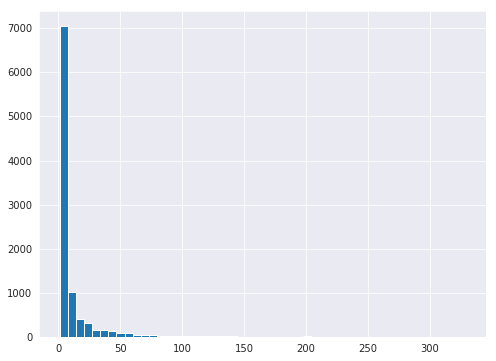

In [26]:
import matplotlib.pyplot as plt  
import seaborn as sns  
sns.set_style('dark')  
%matplotlib inline

plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating_counts'].hist(bins=50)  

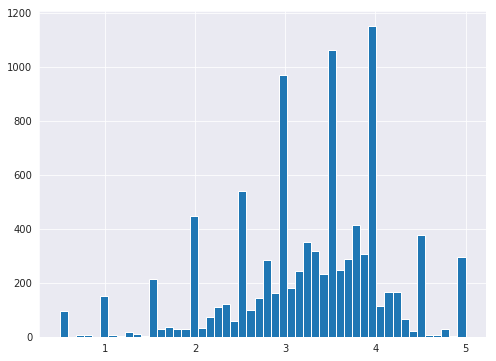

In [27]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating'].hist(bins=50) 

/Users/FatemaK/anaconda3/envs/web/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 576x432 with 0 Axes>

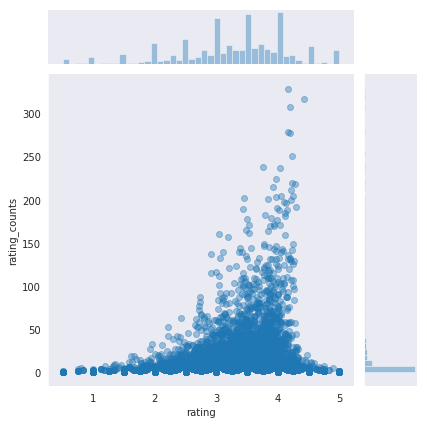

In [28]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)  

To create the matrix of movie titles and corresponding user ratings

In [29]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')  

In [30]:
user_movie_rating.head()  

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']

In [32]:
forrest_gump_ratings.head() 

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [33]:
forrest_gump_ratings.shape

(610,)

In [58]:
movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)

corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation']) 
# corr_forrest_gump.dropna(inplace=True)
# corr_forrest_gump.head()  

/Users/FatemaK/anaconda3/envs/web/lib/python3.6/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/FatemaK/anaconda3/envs/web/lib/python3.6/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [59]:
corr_forrest_gump.shape

(9719, 1)

In [60]:
corr_forrest_gump.dropna(inplace=True)

In [61]:
corr_forrest_gump.shape

(5460, 1)

In [62]:
corr_forrest_gump.sort_values('Correlation', ascending=False).head(10) 

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
Playing God (1997),1.0
Killers (2010),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0


From the output you can see that the movies that have high correlation with "Forrest Gump (1994)" are not very well known. 

A solution to this problem is to retrieve only those correlated movies that have at least more than 50 ratings. To do so, will add the rating_counts column from the rating_mean_count dataframe to our corr_forrest_gump dataframe.

In [63]:
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])  
corr_forrest_gump.head() 

,Correlation,rating_counts
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [64]:
corr_forrest_gump[corr_forrest_gump ['rating_counts']>50].sort_values('Correlation', ascending=False).head()

,Correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,329
Mr. Holland's Opus (1995),0.652144,80
Pocahontas (1995),0.550118,68
Grumpier Old Men (1995),0.534682,52
Caddyshack (1980),0.520328,52


The movies in the list are some of the most famous movies Hollywood movies, and since "Forest Gump (1994)" is also a very famous movie, there is a high chance that these movies are correlated.

In [70]:
corr_movie_top10 = corr_forrest_gump[corr_forrest_gump['rating_counts'] > 50].sort_values('Correlation', ascending=False).head(10).reset_index()

In [74]:
pd.merge(movies, corr_movie_top10, how = 'inner')

,movieId,title,genres,year,Correlation,rating_counts
0,3,Grumpier Old Men (1995),Comedy|Romance,1995,0.534682,52
1,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance,1995,0.550118,68
2,62,Mr. Holland's Opus (1995),Drama,1995,0.652144,80
3,356,Forrest Gump (1994),Comedy|Drama|Romance|War,1994,1.000000,329
4,1302,Field of Dreams (1989),Children|Drama|Fantasy,1989,0.503845,56
5,1704,Good Will Hunting (1997),Drama|Romance,1997,0.484042,141
6,2268,"Few Good Men, A (1992)",Crime|Drama|Thriller,1992,0.517146,57
7,2797,Big (1988),Comedy|Drama|Fantasy|Romance,1988,0.492351,91
8,3489,Hook (1991),Adventure|Comedy|Fantasy,1991,0.484676,53
9,3552,Caddyshack (1980),Comedy,1980,0.520328,52


## Using Matrix Factorization

This is based on https://beckernick.github.io/matrix-factorization-recommender/

$$R = U\Sigma V^T$$
where $R$ is user ratings matrix, $U$ is the user “features” matrix, 
$\Sigma$ is the diagonal matrix of singular values (essentially weights), and $V^T$ is the movie “features” matrix. $U$ and $V^T$ are orthogonal, and represent different things. $U$ represents how much users “like” each feature and $V^T$ represents how relevant each feature is to each movie.

Using the larger set

In [40]:
R_df = ratings.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)

In [41]:
R_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Normalize the data by using the mean

In [42]:
R = R_df.values
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [43]:
R_demeaned

array([[ 3.89582476, -0.10417524,  3.89582476, ..., -0.10417524,
        -0.10417524, -0.10417524],
       [-0.01177499, -0.01177499, -0.01177499, ..., -0.01177499,
        -0.01177499, -0.01177499],
       [-0.00976964, -0.00976964, -0.00976964, ..., -0.00976964,
        -0.00976964, -0.00976964],
       ...,
       [ 2.23215755,  1.73215755,  1.73215755, ..., -0.26784245,
        -0.26784245, -0.26784245],
       [ 2.98755656, -0.01244344, -0.01244344, ..., -0.01244344,
        -0.01244344, -0.01244344],
       [ 4.50611888, -0.49388112, -0.49388112, ..., -0.49388112,
        -0.49388112, -0.49388112]])

### Singular Value Decomposition

In [44]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 50)

The function returns exactly what I detailed earlier in this post, except that the $\Sigma$ returned is just the values instead of a diagonal matrix. 

In [45]:
sigma = np.diag(sigma)

### Making Predictions from the Decomposed Matrices

In [46]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns)

### Making Movie Recommendations

In [47]:
def recommend_movies(predictions_df, userID, movies_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # UserID starts at 1, not 0
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.userId == (userID)]
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'movieId', right_on = 'movieId').
                     sort_values(['rating'], ascending=False)
                 )

    print('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print('Recommending the highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies_df[~movies_df['movieId'].isin(user_full['movieId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movieId',
               right_on = 'movieId').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

already_rated, predictions = recommend_movies(preds_df, 1, movies, ratings, 10)

User 1 has already rated 232 movies.
Recommending the highest 10 predicted ratings movies not already rated.


In [48]:
already_rated.head()

,userId,movieId,rating,timestamp,title,genres,year
231,1,5060,5.0,964984002,M*A*S*H (a.k.a. MASH) (1970),Comedy|Drama|War,1970
185,1,2872,5.0,964981680,Excalibur (1981),Adventure|Fantasy,1981
89,1,1291,5.0,964981909,Indiana Jones and the Last Crusade (1989),Action|Adventure,1989
90,1,1298,5.0,964984086,Pink Floyd: The Wall (1982),Drama|Musical,1982
190,1,2948,5.0,964982191,From Russia with Love (1963),Action|Adventure|Thriller,1963


In [76]:
predictions

,movieId,title,genres,year
736,1036,Die Hard (1988),Action|Crime|Thriller,1988
844,1221,"Godfather: Part II, The (1974)",Crime|Drama,1974
974,1387,Jaws (1975),Action|Horror,1975
615,858,"Godfather, The (1972)",Crime|Drama,1972
1328,1968,"Breakfast Club, The (1985)",Comedy|Drama,1985
874,1259,Stand by Me (1986),Adventure|Drama,1986
1927,2804,"Christmas Story, A (1983)",Children|Comedy,1983
1416,2080,Lady and the Tramp (1955),Animation|Children|Comedy|Romance,1955
2765,4011,Snatch (2000),Comedy|Crime|Thriller,2000
1417,2081,"Little Mermaid, The (1989)",Animation|Children|Comedy|Musical|Romance,1989


In [93]:
(pd.datetime.now() - pd.Timestamp("1970-01-01"))// pd.Timedelta('1s')

1543948106

In [175]:
user_ratings = ratings[ratings['userId'] == 1]

In [174]:
user_ratings.append(pd.DataFrame({'userId':[1],'movieId':[1],'rating':[3],'timestamp':[222222]}))

,userId,movieId,rating,timestamp
0,1.0,1.0,3.0,222222.0
1,1.0,3.0,4.0,964981247.0
2,1.0,6.0,4.0,964982224.0
3,1.0,47.0,5.0,964983815.0
4,1.0,50.0,5.0,964982931.0
5,1.0,70.0,3.0,964982400.0
6,1.0,101.0,5.0,964980868.0
7,1.0,110.0,4.0,964982176.0
8,1.0,151.0,5.0,964984041.0
9,1.0,157.0,5.0,964984100.0


In [171]:
user_ratings.head()

,userId,movieId,rating,timestamp
0,1.0,1.0,3.0,222222.0
1,1.0,3.0,4.0,964981247.0
2,1.0,6.0,4.0,964982224.0
3,1.0,47.0,5.0,964983815.0
4,1.0,50.0,5.0,964982931.0


In [172]:
 user_ratings.loc[user_ratings.groupby(['userId','movieId'])['timestamp'].idxmax()].head() 

,userId,movieId,rating,timestamp
0,1.0,1.0,3.0,222222.0
1,1.0,3.0,4.0,964981247.0
2,1.0,6.0,4.0,964982224.0
3,1.0,47.0,5.0,964983815.0
4,1.0,50.0,5.0,964982931.0


In [173]:
user_ratings[user_ratings['movieId'] == 999]

,userId,movieId,rating,timestamp


In [180]:
user_ratings

,userId,movieId,rating,timestamp
0,1.0,3.0,3.0,222222.0
1,1.0,3.0,4.0,964981247.0
2,1.0,6.0,4.0,964982224.0
3,1.0,47.0,5.0,964983815.0
4,1.0,50.0,5.0,964982931.0
5,1.0,70.0,3.0,964982400.0
6,1.0,101.0,5.0,964980868.0
7,1.0,110.0,4.0,964982176.0
8,1.0,151.0,5.0,964984041.0
9,1.0,157.0,5.0,964984100.0


In [197]:
rating = 3
timestamp = 792136

In [195]:
ratings.loc[(ratings['userId'] == 1)&(ratings['movieId']==1),'rating'] = 0

In [202]:
ratings.loc[(ratings['userId'] == 1) & (ratings['movieId'] == 1), 'timestamp'] = timestamp

In [203]:
ratings.loc[(ratings['userId'] == 1) & (ratings['movieId'] == 1), 'rating'] = rating

In [204]:
ratings

,userId,movieId,rating,timestamp
0,1,1,3.0,792136
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100
